In [21]:
!pip install pandas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
calendar = pd.read_csv('calendar-9-18-22.csv')
reviews = pd.read_csv('reviews-9-18-22.csv')
weather = pd.read_csv('SD_Weather_Data2.csv')
listing = pd.read_csv('listings-9-18-22.csv')
neighbour = pd.read_csv('neighbourhoods-9-18-22.csv')

print(calendar.head())
print(reviews.head())
print(weather.head())
print(listing.head())
print(neighbour.head())

print("Calendar columns: ", calendar.columns)
print("Reviews columns: ", reviews.columns)
print("Weather columns: ", weather.columns)
print("Listing columns: ", listing.columns)
print("Neighbour columns: ", neighbour.columns)

   listing_id        date available    price adjusted_price  minimum_nights  \
0       29967  2022-09-18         f  $225.00        $225.00             4.0   
1       29967  2022-09-19         f  $225.00        $225.00             4.0   
2       29967  2022-09-20         f  $225.00        $225.00             4.0   
3       29967  2022-09-21         f  $225.00        $225.00             4.0   
4       29967  2022-09-22         f  $225.00        $225.00             4.0   

   maximum_nights  
0           365.0  
1           365.0  
2           365.0  
3           365.0  
4           365.0  
   listing_id     id        date  reviewer_id reviewer_name  \
0       29967  62788  2010-07-09       151260        Debbie   
1       29967  64568  2010-07-14       141552          Eric   
2       29967  67502  2010-07-22       141591         David   
3       29967  70466  2010-07-29       125982        Anders   
4       29967  74876  2010-08-07        29835        Miyoko   

                          

# Cleaning

### Null

In [3]:
print(calendar.isnull().sum())
print(reviews.isnull().sum())
print(weather.isnull().sum())
print(listing.isnull().sum())
print(neighbour.isnull().sum())

listing_id           0
date                 0
available            0
price             2695
adjusted_price    2695
minimum_nights    5821
maximum_nights    5821
dtype: int64
listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      1
comments         200
dtype: int64
Date        25
Precip      26
Max Temp    27
Min Temp    27
dtype: int64
id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               1665
Length: 75, dtype: int64
neighb

In [4]:
calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float)
calendar['adjusted_price'] = calendar['adjusted_price'].replace('[\$,]', '', regex=True).astype(float)

# Fill null values
calendar['price'].fillna(calendar['price'].mean(), inplace=True)
calendar['adjusted_price'].fillna(calendar['adjusted_price'].mean(), inplace=True)
calendar['minimum_nights'].fillna(calendar['minimum_nights'].mean(), inplace=True)
calendar['maximum_nights'].fillna(calendar['maximum_nights'].mean(), inplace=True)

In [5]:
reviews.dropna(subset=['reviewer_name', 'comments'], inplace=True)

In [6]:
weather.dropna(inplace=True)

In [7]:
listing['reviews_per_month'].fillna(listing['reviews_per_month'].mean(), inplace=True)

In [8]:
neighbour['neighbourhood_group'].fillna('Unknown', inplace=True)

### Duplicates

In [9]:
calendar = calendar.drop_duplicates()
reviews = reviews.drop_duplicates()
weather = weather.drop_duplicates()
listing = listing.drop_duplicates()
neighbour = neighbour.drop_duplicates()

# Merging

In [10]:
dataframes = [calendar, reviews, weather, listing, neighbour]

for df in dataframes:
    print("\nDataFrame Information:")
    print(df.info())
    print("\nFirst few rows:")
    print(df.head())


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5173672 entries, 0 to 5173671
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           float64
 4   adjusted_price  float64
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 315.8+ MB
None

First few rows:
   listing_id        date available  price  adjusted_price  minimum_nights  \
0       29967  2022-09-18         f  225.0           225.0             4.0   
1       29967  2022-09-19         f  225.0           225.0             4.0   
2       29967  2022-09-20         f  225.0           225.0             4.0   
3       29967  2022-09-21         f  225.0           225.0             4.0   
4       29967  2022-09-22         f  225.0           225.0             4.0   

   maximum_nights  
0           365.0  
1       

In [11]:
def convert_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%Y%m%d')
    except ValueError:
        return pd.NaT

weather['Date'] = weather['Date'].apply(convert_date)

In [12]:
calendar['date'] = pd.to_datetime(calendar['date'])
reviews['date'] = pd.to_datetime(reviews['date'])
weather['Date'] = pd.to_datetime(weather['Date'], format='%Y%m%d')
listing['last_scraped'] = pd.to_datetime(listing['last_scraped'])

# Merge calendar and weather on the date column
merged_df = pd.merge(calendar, weather, how='inner', left_on='date', right_on='Date')

# Convert 'Precip' to numeric, considering 'T' as a very small amount
merged_df['Precip'] = pd.to_numeric(merged_df['Precip'].replace('T', '0.001'), errors='coerce')

# Merge merged_df with listing on the listing_id and id columns
final_df = pd.merge(merged_df, listing, how='inner', left_on='listing_id', right_on='id')

# Calculate the correlation between Precip and price
correlation = final_df['Precip'].corr(final_df['price_x'])

print(correlation)

0.0014938065938024938


# EDA

In [13]:
print(final_df.head())

   listing_id       date available  price_x  adjusted_price  minimum_nights_x  \
0       29967 2022-09-18         f    225.0           225.0               4.0   
1       29967 2022-09-19         f    225.0           225.0               4.0   
2       29967 2022-09-20         f    225.0           225.0               4.0   
3       29967 2022-09-21         f    225.0           225.0               4.0   
4       29967 2022-09-22         f    225.0           225.0               4.0   

   maximum_nights_x       Date  Precip  Max Temp  ...  \
0             365.0 2022-09-18     0.0      76.0  ...   
1             365.0 2022-09-19     0.0      78.0  ...   
2             365.0 2022-09-20     0.0      80.0  ...   
3             365.0 2022-09-21     0.0      79.0  ...   
4             365.0 2022-09-22     0.0      81.0  ...   

   review_scores_communication  review_scores_location review_scores_value  \
0                         4.91                     4.8                4.76   
1             

In [14]:
print(final_df.describe())

         listing_id       price_x  adjusted_price  minimum_nights_x  \
count  5.173672e+06  5.173672e+06    5.173672e+06      5.173672e+06   
mean   1.598379e+17  3.963504e+02    3.947934e+02      7.522396e+00   
std    2.767907e+17  1.185316e+03    1.182978e+03      2.054569e+01   
min    2.996700e+04  0.000000e+00    0.000000e+00      0.000000e+00   
25%    2.501354e+07  1.250000e+02    1.250000e+02      2.000000e+00   
50%    4.540952e+07  2.120000e+02    2.110000e+02      3.000000e+00   
75%    5.223218e+17  3.990000e+02    3.990000e+02      5.000000e+00   
max    7.181068e+17  1.000000e+05    1.000000e+05      9.990000e+02   

       maximum_nights_x        Precip      Max Temp      Min Temp  \
count      5.173672e+06  5.173672e+06  5.173672e+06  5.173672e+06   
mean       3.040892e+05  1.051846e-02  6.970709e+01  5.249872e+01   
std        2.550710e+07  2.854911e-02  7.442511e+00  8.658091e+00   
min        0.000000e+00  0.000000e+00  5.400000e+01  3.500000e+01   
25%        3.65

In [15]:
print(final_df.isnull().sum())

listing_id                                      0
date                                            0
available                                       0
price_x                                         0
adjusted_price                                  0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 86, dtype: int64


In [16]:
print(final_df.dtypes)

listing_id                                               int64
date                                            datetime64[ns]
available                                               object
price_x                                                float64
adjusted_price                                         float64
                                                     ...      
calculated_host_listings_count                           int64
calculated_host_listings_count_entire_homes              int64
calculated_host_listings_count_private_rooms             int64
calculated_host_listings_count_shared_rooms              int64
reviews_per_month                                      float64
Length: 86, dtype: object


In [17]:
for column in final_df.select_dtypes(include=['object']):
    print(f"{column}: {final_df[column].unique()}")

available: ['f' 't']
listing_url: ['https://www.airbnb.com/rooms/29967' 'https://www.airbnb.com/rooms/38245'
 'https://www.airbnb.com/rooms/126344' ...
 'https://www.airbnb.com/rooms/30062750'
 'https://www.airbnb.com/rooms/47976536'
 'https://www.airbnb.com/rooms/1906699']
source: ['city scrape' 'previous scrape']
name: ['Great home, 10 min walk to Beach' 'Point Loma: Den downstairs'
 'Tourmaline House - Steps to Beach, Pet-Friendly' ...
 '1 Bedroom on the Sand, on Second Floor'
 'Safe Private Studio Apt (2)Playas Tijuana-Getaway'
 'Nice, quiet,private Room at North La Jolla/ UTC']
description: ['This 2 bedroom, 2 full bathroom home offers all the comforts you and your family need to enjoy a great San Diego experience.  Our property is equipped with a full kitchen, patio for BBQing and everything you need to enjoy the beach.<br /><br /><b>The space</b><br />This two bedroom (1 CA king bed, 1 queen bed), 2 full bathroom duplex is less than two blocks to beautiful Tourmaline Surf Beach.

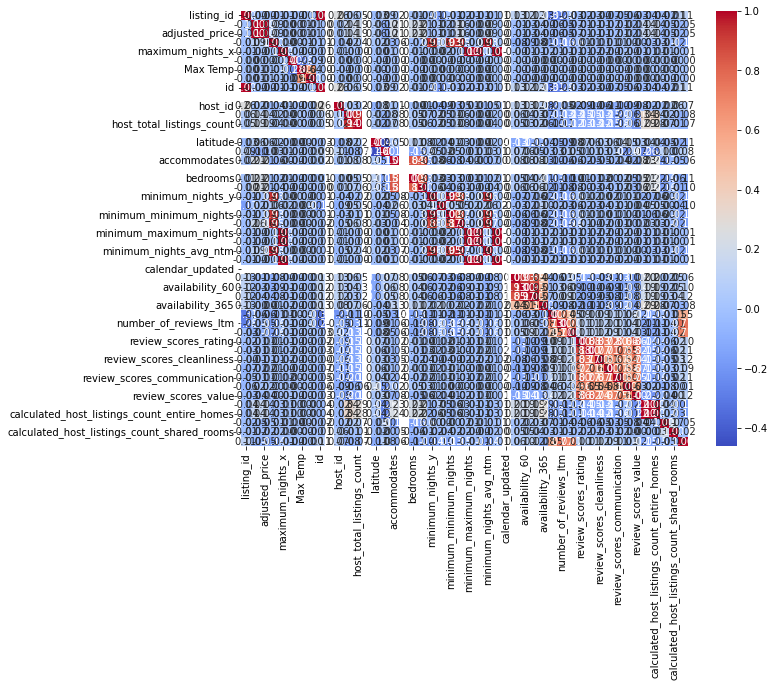

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(final_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

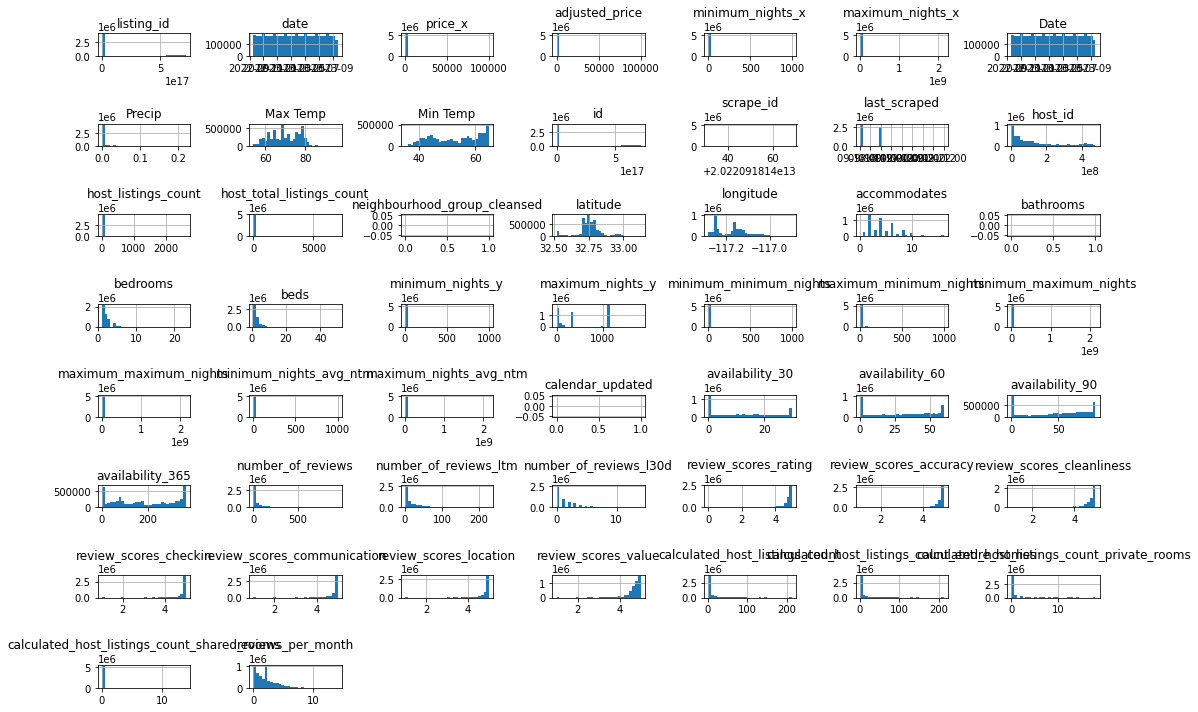

In [19]:
final_df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

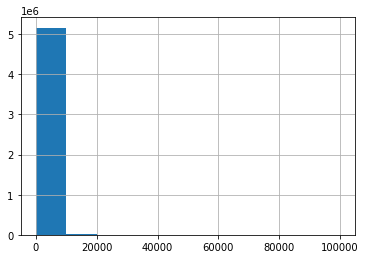

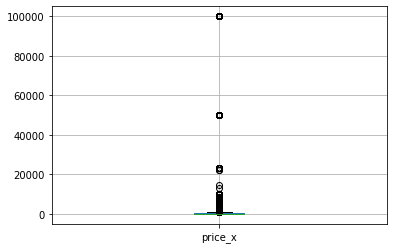

In [23]:
# Histogram
final_df['price_x'].hist()
plt.show()

# Box plot
final_df.boxplot(column='price_x')
plt.show()

In [22]:
# Correlation matrix
print(final_df.corr())

                                              listing_id   price_x  \
listing_id                                      1.000000 -0.004370   
price_x                                        -0.004370  1.000000   
adjusted_price                                 -0.004138  0.999401   
minimum_nights_x                               -0.012980  0.091501   
maximum_nights_x                               -0.006859 -0.002876   
Precip                                         -0.000055  0.001494   
Max Temp                                       -0.000002  0.007529   
Min Temp                                       -0.000021  0.009126   
id                                              1.000000 -0.004370   
scrape_id                                            NaN       NaN   
host_id                                         0.260214  0.015472   
host_listings_count                             0.063681  0.143062   
host_total_listings_count                       0.048320  0.185975   
neighbourhood_group_